In [1]:

%load_ext autoreload
%autoreload 2
import pandas as pd
from cv2x_data_handler import cv2xDataHandler as dh
from cv2x_plotter import *
from numpy import inf

# Throughput and Packet Loss

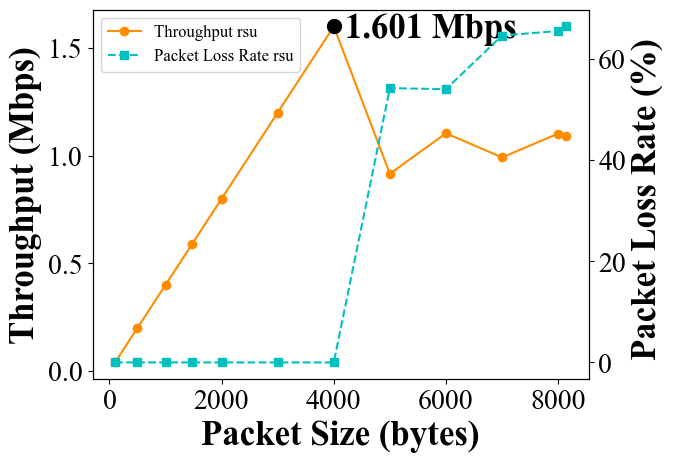

In [9]:
# Indoor
dataset_path = '../../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            pck=dh.getPacketSizeFromRxLog(t)
            tThroughput = dh.calculateAvgThroughput(t)
            tLoss= dh.calculateAvgLoss(t)
            y_throughput[whichTx][pck] = tThroughput
            y_loss[whichTx][pck] = tLoss
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))
    drawLineChart4ThroughputNLoss(y_throughput, 
                                  y_loss,
                                  showPeak=True,
                                  title ='Rx'+whichRx)
            
        

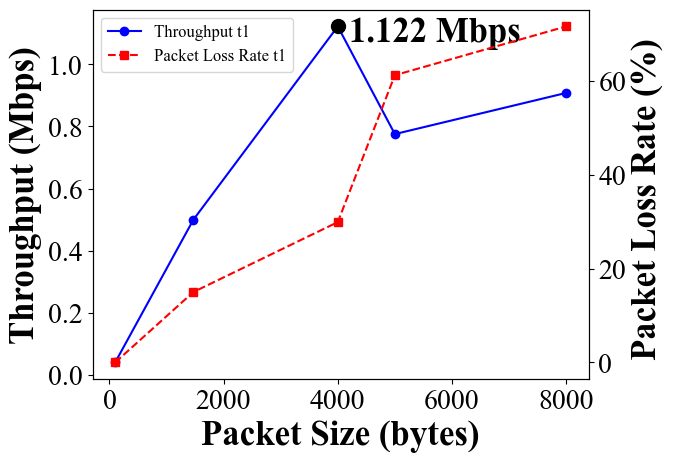

In [10]:
# Outdoor
dataset_path = '../../seev2x_dataset_final/outdoor_parkinglot/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            pck=dh.getPacketSizeFromRxLog(t)
            tThroughput = dh.calculateAvgThroughput(t)
            tLoss= dh.calculateAvgLoss(t)
            y_throughput[whichTx][pck] = tThroughput
            y_loss[whichTx][pck] = tLoss
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))
    drawLineChart4ThroughputNLoss(y_throughput, 
                                  y_loss,
                                  showPeak=True,
                                  title = 'Rx'+whichRx)

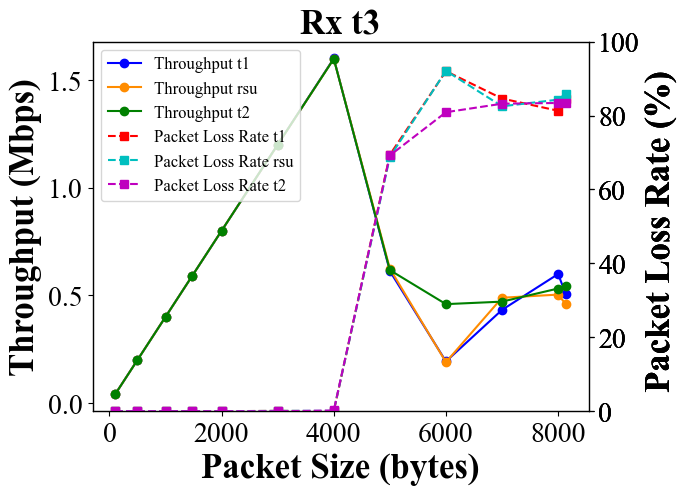

In [26]:
# 3TX
dataset_path = '../../seev2x_dataset_final/indoor_allcombos/3_tx'
data = dh.getRxTracesByConfiguration(dataset_path,prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            pck=dh.getPacketSizeFromRxLog(t)
            tThroughput = dh.calculateAvgThroughput(t)
            tLoss= dh.calculateAvgLoss(t)
            y_throughput[whichTx][pck] = tThroughput
            y_loss[whichTx][pck] = tLoss
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))   
    drawLineChart4ThroughputNLoss(y_throughput, 
                                  y_loss,
                                  title ='Rx '+whichRx)
            
        

throughput max 1.92
throughput mean 1.121797752808972
loss max 1
loss mean 0.2455922009253138


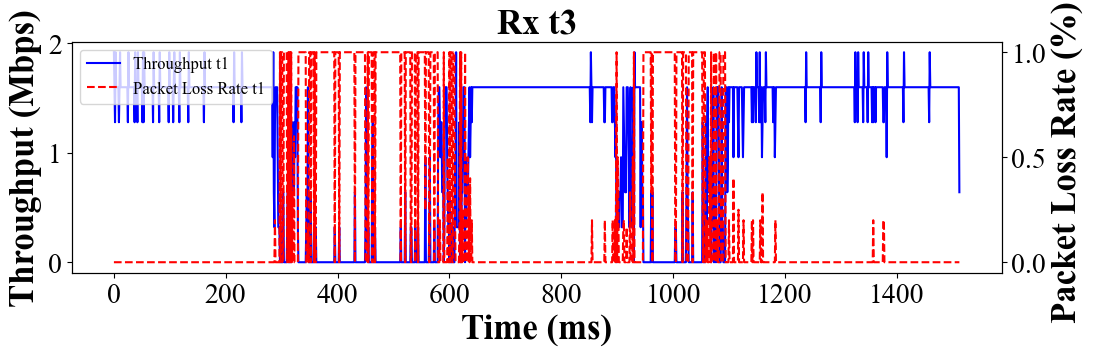

In [22]:
# Parkinglot
dataset_path = '../../seev2x_dataset_final/outdoor_parkinglot/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,
                                     resv=20,
                                     ipg=20)
if(len(data)==0):
    print('No data found')
    raise SystemExit("Stop!")
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            metrics = dh.getRxAvg100msMetrics(t)
            tThroughput = metrics[['avg_throughput(100ms)']]
            tLoss = metrics[['avg_packet_loss(100ms)']]
            for k,v in tThroughput.iterrows():
                y_throughput[whichTx][k] = v['avg_throughput(100ms)']/1000000
            for k,v in tLoss.iterrows():
                if v['avg_packet_loss(100ms)'] == inf:
                    y_loss[whichTx][k] = 1
                else:
                    y_loss[whichTx][k] = v['avg_packet_loss(100ms)']
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))   
    drawThroughputNLossByTimer(y_throughput, 
                                y_loss,
                                  title ='Rx '+whichRx)

throughput max 1.92
throughput mean 0.09324815724815702
loss max 1
loss mean 0.9205891891891892
throughput max 1.92
throughput mean 0.8460406370126088
loss max 1
loss mean 0.4489242174629326
throughput max 1.92
throughput mean 0.23230016313213775
loss max 1
loss mean 0.8256725122349103
throughput max 1.92
throughput mean 1.5756862745098672
loss max 1
loss mean 0.006040032679738559
throughput max 1.92
throughput mean 0.18739039665970839
loss max 1
loss mean 0.8522261656228253
throughput max 1.92
throughput mean 0.10525957446808482
loss max 1
loss mean 0.9140353191489361
throughput max 1.92
throughput mean 1.590176582450489
loss max 1
loss mean 0.0026981798424341214
throughput max 1.6
throughput mean 0.06651597051597033
loss max 1
loss mean 0.9339547911547912
throughput max 1.92
throughput mean 0.17784050811573776
loss max 1
loss mean 0.8629671841919548


throughput max 1.92
throughput mean 0.6336035049288037
loss max 1
loss mean 0.5197360350492879
throughput max 1.92
throughput mean 0.5921546961325876
loss max 1
loss mean 0.5858529005524867
throughput max 1.92
throughput mean 0.13997138769670966
loss max 1
loss mean 0.8873987839771101


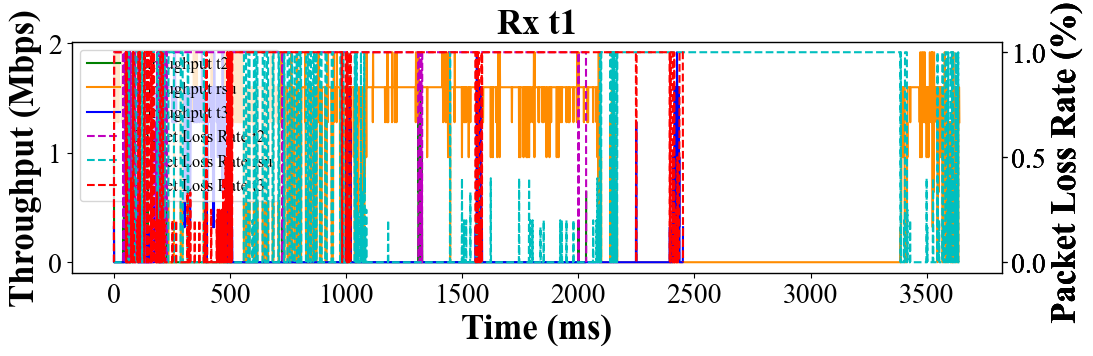

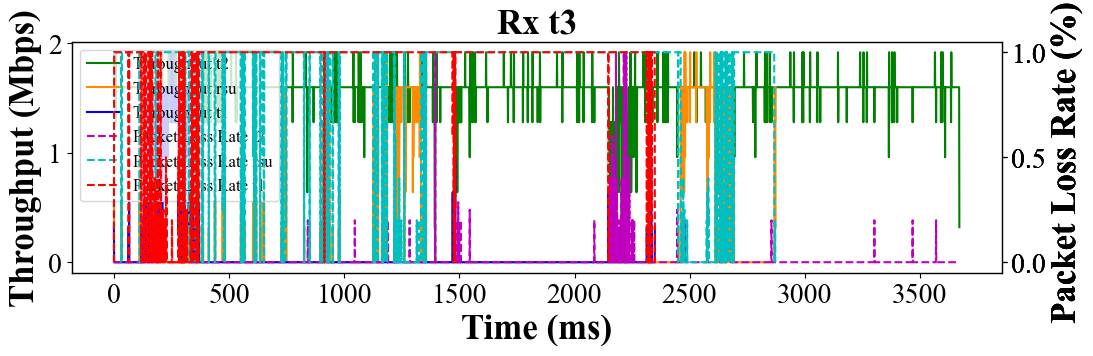

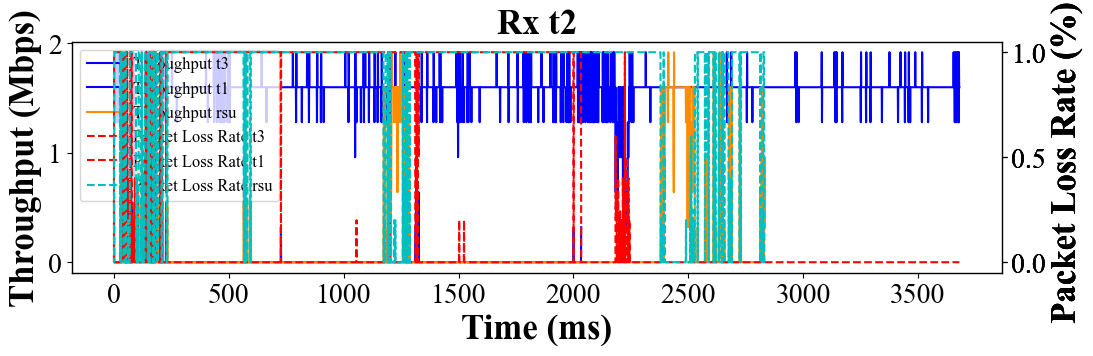

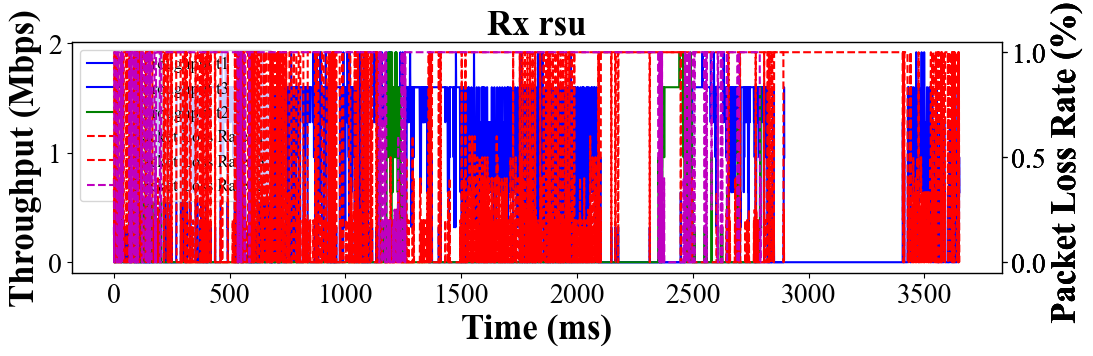

In [19]:
# Intersection - perception
dataset_path = '../../seev2x_dataset_final/outdoor_openroad'
data = dh.getRxTracesByApp(dataset_path,
                           name = 'intersection_5',
                           app='perception')
if(len(data)==0):
    print('No data found')
    raise SystemExit("Stop!")
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            metrics = dh.getRxAvg100msMetrics(t)
            tThroughput = metrics[['avg_throughput(100ms)']]
            tLoss = metrics[['avg_packet_loss(100ms)']]
            for k,v in tThroughput.iterrows():
                y_throughput[whichTx][k] = v['avg_throughput(100ms)']/1000000
            for k,v in tLoss.iterrows():
                if v['avg_packet_loss(100ms)'] == inf:
                    y_loss[whichTx][k] = 1
                else:
                    y_loss[whichTx][k] = v['avg_packet_loss(100ms)']
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))   
    drawThroughputNLossByTimer(y_throughput, 
                                y_loss,
                                  title ='Rx '+whichRx)

# Latency and Jitter

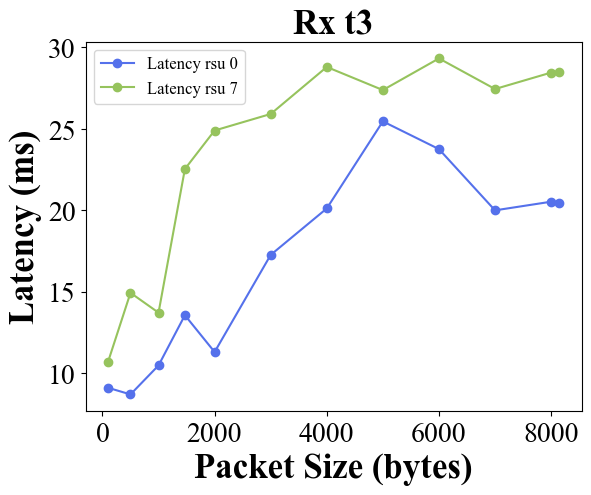

In [13]:
# Latency Indoor
dataset_path = '../../seev2x_dataset_final/indoor_allcombos/1_tx'
checked_priority = [0,7]
final_dict ={}
for prio in checked_priority:
    data = dh.getRxTracesByConfiguration(dataset_path,
                                        prio=prio,resv=20,ipg=20)
    for whichRx, v in data.items():
        y_latency = {}
        for whichTx, logs in v.items(): 
            y_latency[whichTx] = {}
            for log in logs:
                t = pd.read_csv(log)
                pck=dh.getPacketSizeFromRxLog(t)
                tLatency = dh.calculateAvgLatency(t)
                y_latency[whichTx][pck] = tLatency
            y_latency[whichTx] = dict(sorted(y_latency[whichTx].items())) 
        if(whichRx not in final_dict):
            final_dict[whichRx] = {}
        final_dict[whichRx][prio] = y_latency
        
for whichRx, v in final_dict.items():
     drawLineChart4Latency(v, title = 'Rx '+ whichRx)

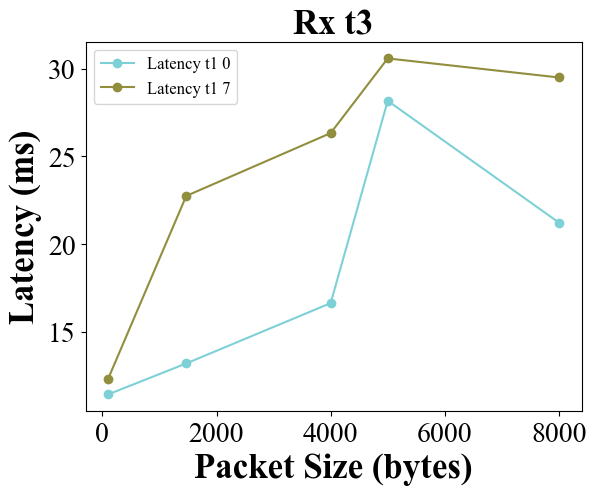

In [14]:
# Latency Indoor
dataset_path = '../../seev2x_dataset_final/outdoor_parkinglot/1_tx'
checked_priority = [0,7]
final_dict ={}
for prio in checked_priority:
    data = dh.getRxTracesByConfiguration(dataset_path,
                                        prio=prio,resv=20,ipg=20)
    for whichRx, v in data.items():
        y_latency = {}
        for whichTx, logs in v.items(): 
            y_latency[whichTx] = {}
            for log in logs:
                t = pd.read_csv(log)
                pck=dh.getPacketSizeFromRxLog(t)
                tLatency = dh.calculateAvgLatency(t)
                y_latency[whichTx][pck] = tLatency
            y_latency[whichTx] = dict(sorted(y_latency[whichTx].items())) 
        if(whichRx not in final_dict):
            final_dict[whichRx] = {}
        final_dict[whichRx][prio] = y_latency
        
for whichRx, v in final_dict.items():
     drawLineChart4Latency(v, title = 'Rx '+ whichRx)

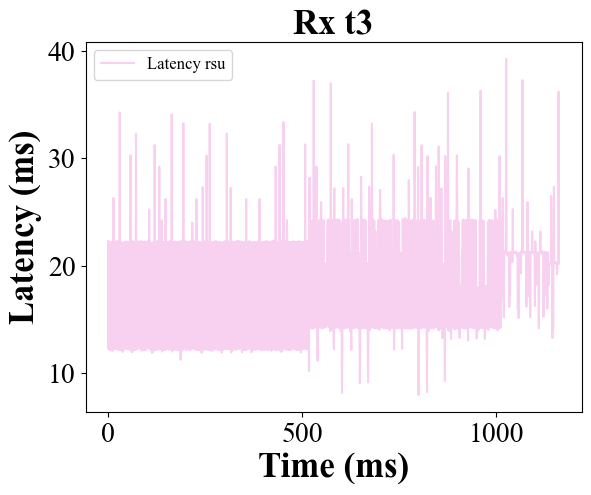

In [15]:
# jitter - misalignment
dataset_path = '../../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=50)
for whichRx, v in data.items():
    y_latency = {}
    for whichTx, logs in v.items(): 
        y_latency[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            t = dh.getRxLatencyMetrics(t)
            for k,v in t.iterrows():
                y_latency[whichTx][k] = v['latency (ms)']
    drawLatencyByTime(y_latency, title = 'Rx '+whichRx)

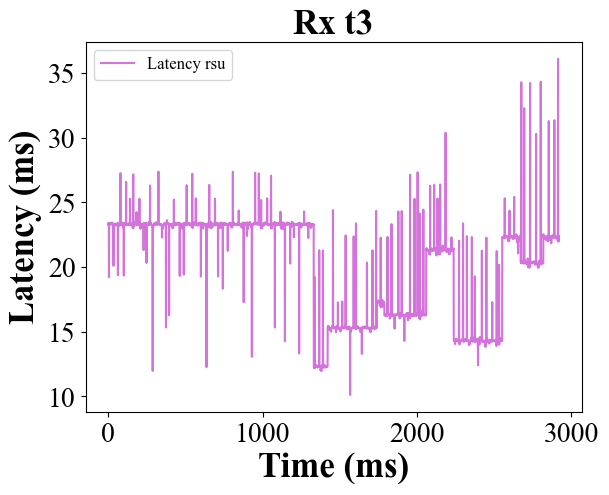

In [16]:
# jitter - alignment
dataset_path = '../../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_latency = {}
    for whichTx, logs in v.items(): 
        y_latency[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            t = dh.getRxLatencyMetrics(t)
            for k,v in t.iterrows():
                y_latency[whichTx][k] = v['latency (ms)']
    drawLatencyByTime(y_latency, title = 'Rx '+whichRx)

# Resource Occupancy 

In [190]:
# Misalignment RBs
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
files = dh.getSCIByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=50)
for f in files:
    rbs = dh.createRBListByMCS(f)
    drawChannelOccupy(rbs, x_range=200)

Loading BokehJS ...

In [191]:
# Alignment RBs
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
files = dh.getSCIByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=20)
for f in files:
    rbs = dh.createRBListByMCS(f)
    drawChannelOccupy(rbs, x_range=200)

Loading BokehJS ...